# Investment Analysis of Top 5 Cryptocurrency on Market

In [647]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [648]:
df = pd.read_csv('./crypto-markets.csv')

In [649]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [650]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date2num'] = df['date'].apply(lambda x: mdates.date2num(x))

In [651]:
Bitcoin = df[df['name']=='Bitcoin']

Let take a look about bitcoin price over years.

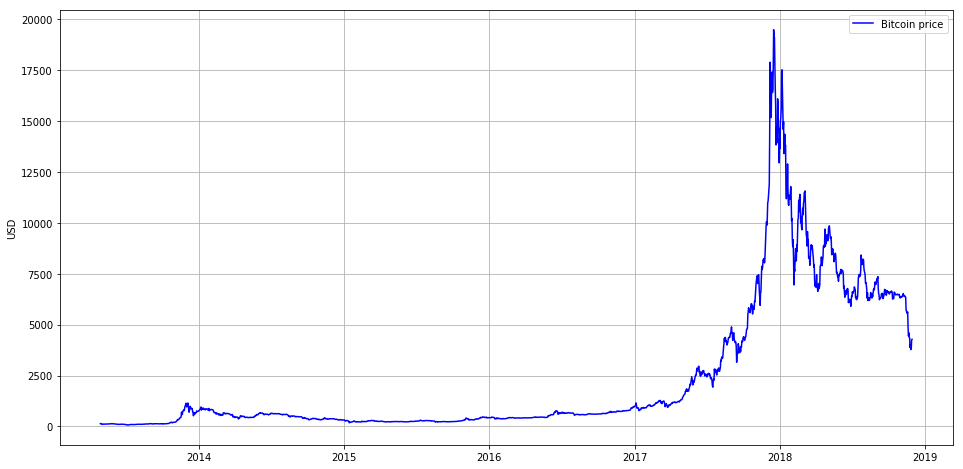

In [652]:
plt.figure(figsize=(16,8))
plt.plot_date(Bitcoin['date'], Bitcoin['close'], fmt='b-', xdate=True, ydate=False, label='Bitcoin price') 
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

It clearly can be seen that the trend really start from year 2017. So we will focuse in year 2017 and later.

In [653]:
data = df[df['date'] >= '2017']

Let find out top 10 cryptocurrency on the market.

In [654]:
data[data['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
9       [Bitcoin SV]
10         [Cardano]
Name: name, dtype: object

In [655]:
Bitcoin = data[data['name']=='Bitcoin']
XRP = data[data['name']=='XRP']
Ethereum = data[data['name']=='Ethereum']
Stellar = data[data['name']=='Stellar']
Bitcoin_Cash = data[data['name']=='Bitcoin Cash']

market cap represents the amount of fiat money invested in the currency. The more market cap volume , the more safe when invest in this coin.

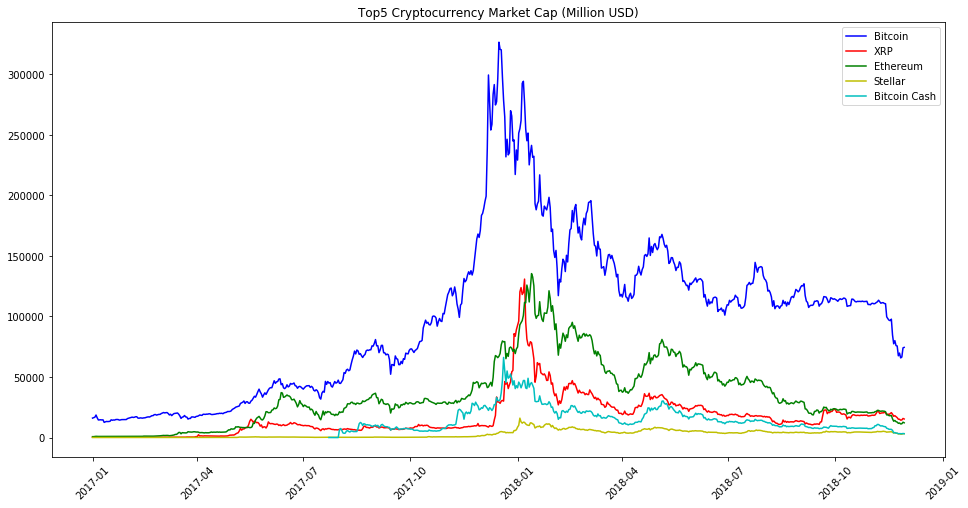

In [656]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['market']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['market']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['market']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['market']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['market']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
plt.show()

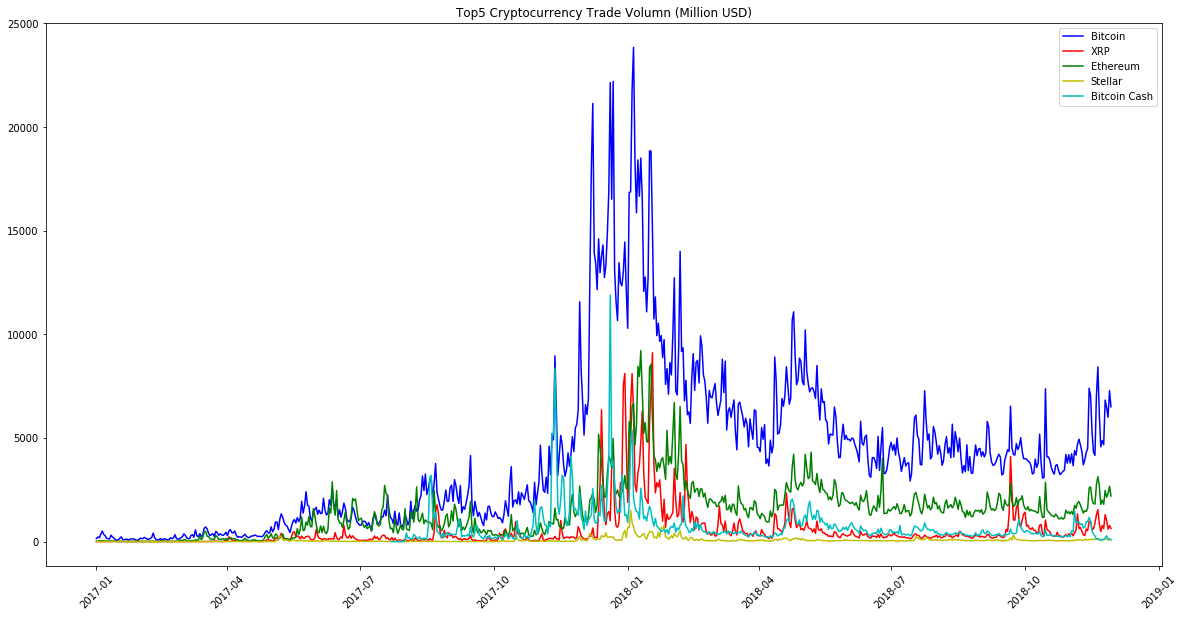

In [657]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['volume']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['volume']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['volume']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['volume']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['volume']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Trade Volumn (Million USD)')
plt.show()

In [658]:
Bitcoin_data = Bitcoin.set_index('date')
XRP_data = XRP.set_index('date')
Ethereum_data = Ethereum.set_index('date')
Stellar_data = Stellar.set_index('date')
Bitcoin_Cash_data  = Bitcoin_Cash.set_index('date')

In [659]:
btc = Bitcoin_data[['close']]
btc.columns = ['BTC']

xrp = XRP_data[['close']]
xrp.columns = ['XRP']

eth = Ethereum_data[['close']]
eth.columns = ['ETH']

xlm = Stellar_data[['close']]
xlm.columns = ['XLM']

bch = Bitcoin_Cash_data[['close']]
bch.columns = ['BCH']

close = pd.concat([btc,xrp,eth,xlm,bch], axis=1, join='inner')

Top 5 coin correlation

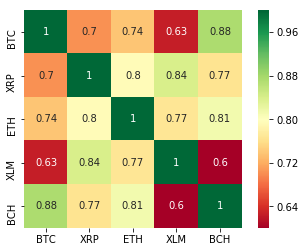

In [660]:
sns.heatmap(close.corr(), annot=True, cmap="RdYlGn", square=True)

In [661]:
close.index.values[0]

numpy.datetime64('2017-07-23T00:00:00.000000000')

In [662]:
close.index.values[len(close)-1]

numpy.datetime64('2018-11-29T00:00:00.000000000')

What do invetor want when they join the cryptocurrency market ? What attracted therm to this market ?

In [663]:
coins_get = (5000/close.iloc[0]).round(3)
coins_get

BTC         1.831
XRP     25633.401
ETH        22.129
XLM    229684.414
BCH        12.105
Name: 2017-07-23 00:00:00, dtype: float64

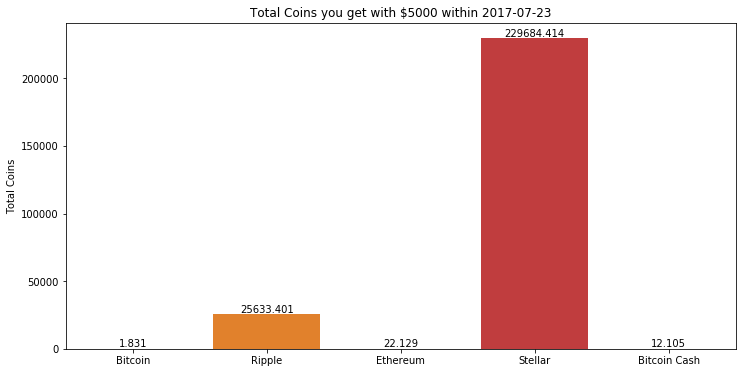

In [664]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'],coins_get.values)
plt.title('Total Coins you get with $5000 within 2017-07-23')
plt.ylabel('Total Coins')
rects = ax.patches
labels = coins_get.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [665]:
value_earn = coins_get * close.tail(1)
value_earn = value_earn.stack()
value_earn.index = value_earn.index.droplevel(0)

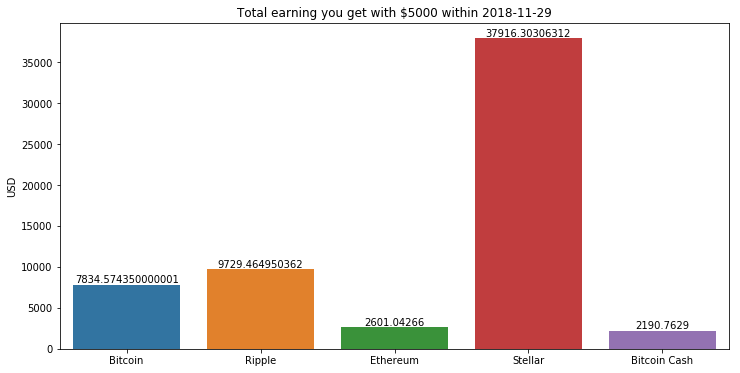

In [666]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'], value_earn)
plt.title('Total earning you get with $5000 within 2018-11-29')
plt.ylabel('USD')
rects = ax.patches
labels = value_earn.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [667]:
Bitcoin = Bitcoin.reset_index(level=0, drop=True)
Bitcoin['pre_volume'] = np.float64()
Bitcoin['pre_market'] = np.float64()
Bitcoin['pre_high'] = np.float64()
Bitcoin['pre_open'] = np.float64()
Bitcoin['pre_close'] = np.float64()
Bitcoin['pre_low'] = np.float64()
Bitcoin['pre_close_ratio'] = np.float64()
Bitcoin['pre_spread'] = np.float64()
Bitcoin['pos/neg'] = np.float64()
for i in range(1,len(Bitcoin)):
    Bitcoin['pre_volume'][i] = Bitcoin['volume'].iloc[i-1]
    Bitcoin['pre_market'][i] = Bitcoin['market'].iloc[i-1]
    Bitcoin['pre_high'][i] = Bitcoin['high'].iloc[i-1]
    Bitcoin['pre_open'][i] = Bitcoin['open'].iloc[i-1]
    Bitcoin['pre_close'][i] = Bitcoin['close'].iloc[i-1]
    Bitcoin['pre_low'][i] = Bitcoin['low'].iloc[i-1]
    Bitcoin['pre_close_ratio'][i] = Bitcoin['close_ratio'].iloc[i-1]
    Bitcoin['pre_spread'][i] = Bitcoin['spread'].iloc[i-1]
for i in range(len(Bitcoin)-1): 
    Bitcoin['pos/neg'][i] = Bitcoin['open'].iloc[i+1] - Bitcoin['close'].iloc[i]
Bitcoin['Up/Down'] = np.where(Bitcoin['pos/neg']>0, '1', '0')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is tryin

In [668]:
Bitcoin.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,pre_volume,pre_market,pre_high,pre_open,pre_close,pre_low,pre_close_ratio,pre_spread,pos/neg,Up/Down
693,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,...,4.679500e+09,6.749563e+10,4413.09,4347.69,3880.76,3795.16,0.1385,617.93,5.10,1
694,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,...,6.825640e+09,6.974927e+10,4120.87,3880.78,4009.97,3585.06,0.7930,535.81,-13.18,0
695,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,...,6.476900e+09,6.573929e+10,4107.14,4015.07,3779.13,3643.92,0.2919,463.22,1.75,1
696,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,...,5.998720e+09,6.646897e+10,3862.96,3765.95,3820.72,3661.01,0.7908,201.95,11.58,1
697,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.00,4413.02,4145.77,4278.85,6.503348e+09,...,7.280280e+09,7.407256e+10,4385.90,3822.47,4257.42,3822.47,0.7720,563.43,0.00,0


In [669]:
Bitcoin = Bitcoin.drop(0)
Bitcoin = Bitcoin.drop(697)
Bitcoin.drop(['high','low', 'slug','symbol','name','ranknow','volume','market','close_ratio','spread'],axis=1,inplace=True)

In [670]:
Bitcoin.head()

,date,open,close,date2num,pre_volume,pre_market,pre_high,pre_open,pre_close,pre_low,pre_close_ratio,pre_spread,pos/neg,Up/Down
1,2017-01-02,998.62,1021.75,736331.0,147775008.0,1.605041e+10,1003.08,963.66,998.33,958.70,0.8930,44.38,-0.15,0
2,2017-01-03,1021.60,1043.84,736332.0,222184992.0,1.642902e+10,1031.39,998.62,1021.75,996.70,0.7221,34.69,0.56,1
3,2017-01-04,1044.40,1154.73,736333.0,185168000.0,1.678637e+10,1044.08,1021.60,1043.84,1021.60,0.9893,22.48,2.00,1
4,2017-01-05,1156.73,1013.38,736334.0,344945984.0,1.857187e+10,1159.42,1044.40,1154.73,1044.40,0.9592,115.02,0.86,1
5,2017-01-06,1014.24,902.20,736335.0,510199008.0,1.630025e+10,1191.10,1156.73,1013.38,910.42,0.3668,280.68,1.29,1


In [671]:
from sklearn.model_selection import train_test_split
Bitcoin_train = Bitcoin.drop(columns=['close','date','pos/neg','Up/Down'])
X = Bitcoin_train
y = Bitcoin['close']

nrow , ncol = Bitcoin.shape

In [672]:
X_train = X.loc[:np.floor(nrow*0.3)]
X_test = X.loc[np.floor(nrow*0.3)+1:]

In [673]:
y_train = y.loc[:np.floor(nrow*0.3)]
y_test = y.loc[np.floor(nrow*0.3)+1:]

In [674]:
date_train = Bitcoin[['date']].loc[:np.floor(nrow*0.3)]
date_test = Bitcoin[['date']].loc[np.floor(nrow*0.3)+1:]

In [675]:
def plot_stock(date, outcome, title, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    plt.plot_date(date, outcome, fmt='b-', xdate=True, ydate=False, label='Real value')
    if prediction is not None:
        plt.plot_date(date, prediction, fmt='r-', xdate=True, ydate=False, label='prediction')
    plt.ylabel('Close prices')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    return

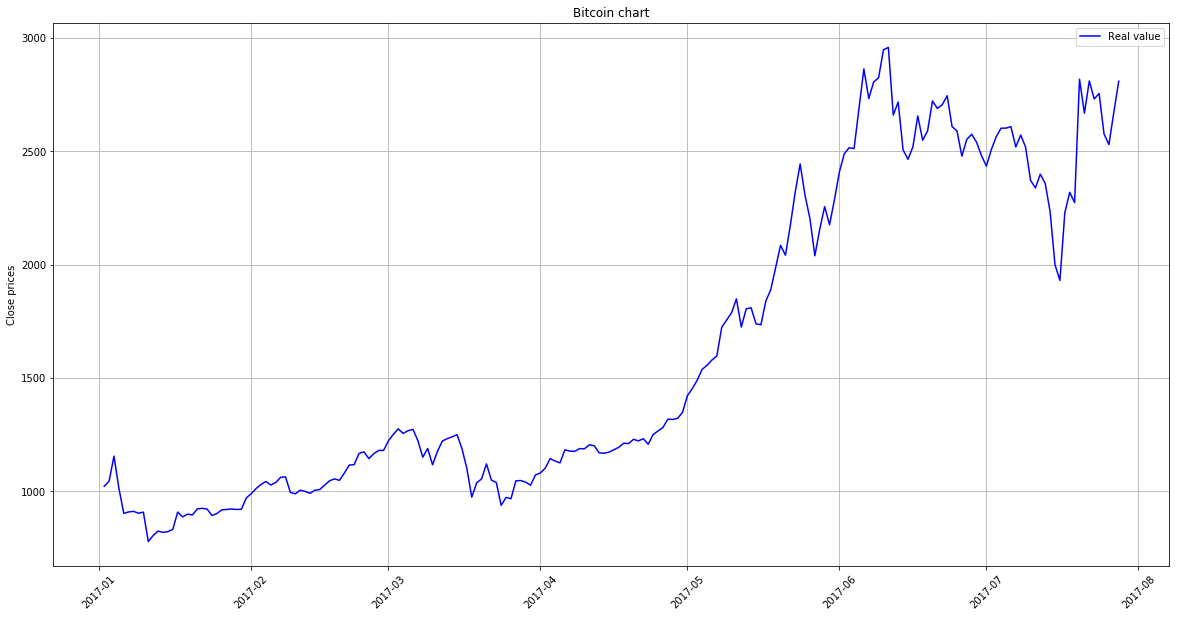

In [676]:
plot_stock(date_train, y_train, "Bitcoin chart")

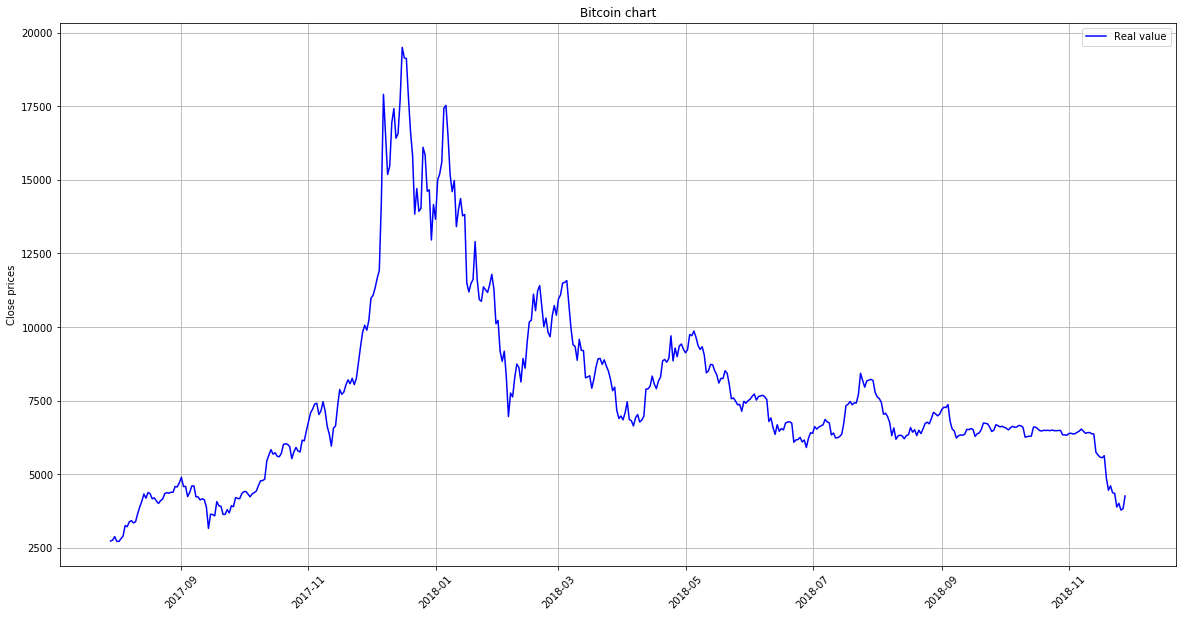

In [677]:
plot_stock(date_test, y_test, "Bitcoin chart")

In [678]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [679]:
print(lm.coef_)
print(lm.intercept_)

[ 1.25765310e+00  3.26795737e-01  8.22991151e-08  1.14008568e-07
 -1.19298894e-01  1.01965454e-01 -2.24793397e+00  5.54057259e-02
  1.36540639e+01 -1.74704620e-01]
-240545.2703380769


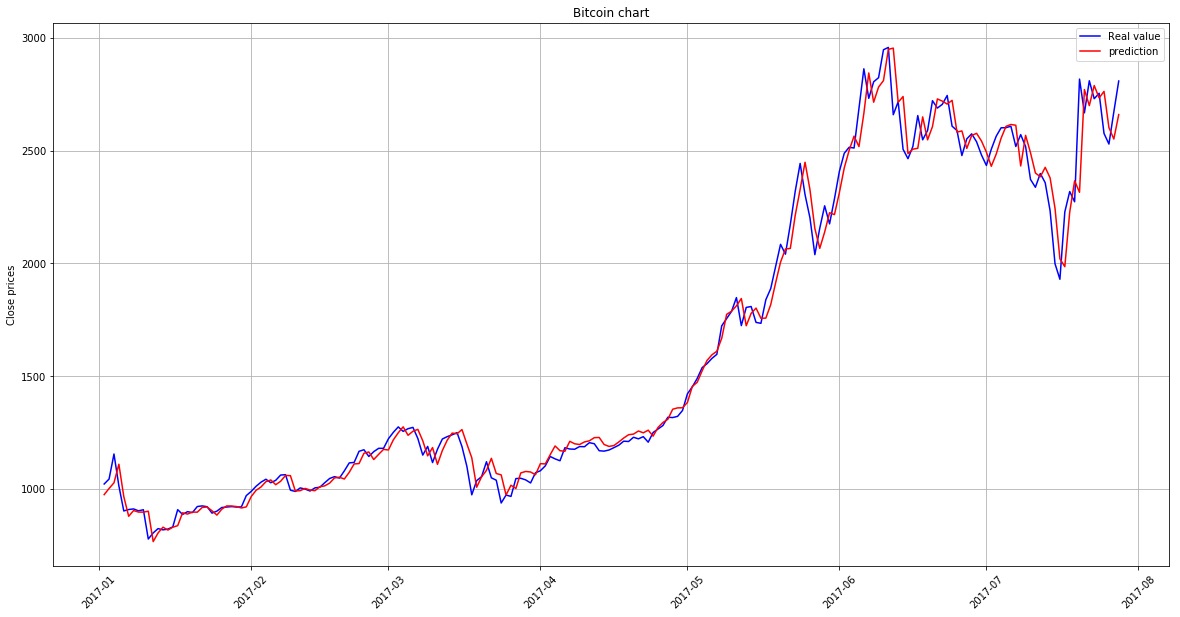

In [680]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, "Bitcoin chart", predictions_train)

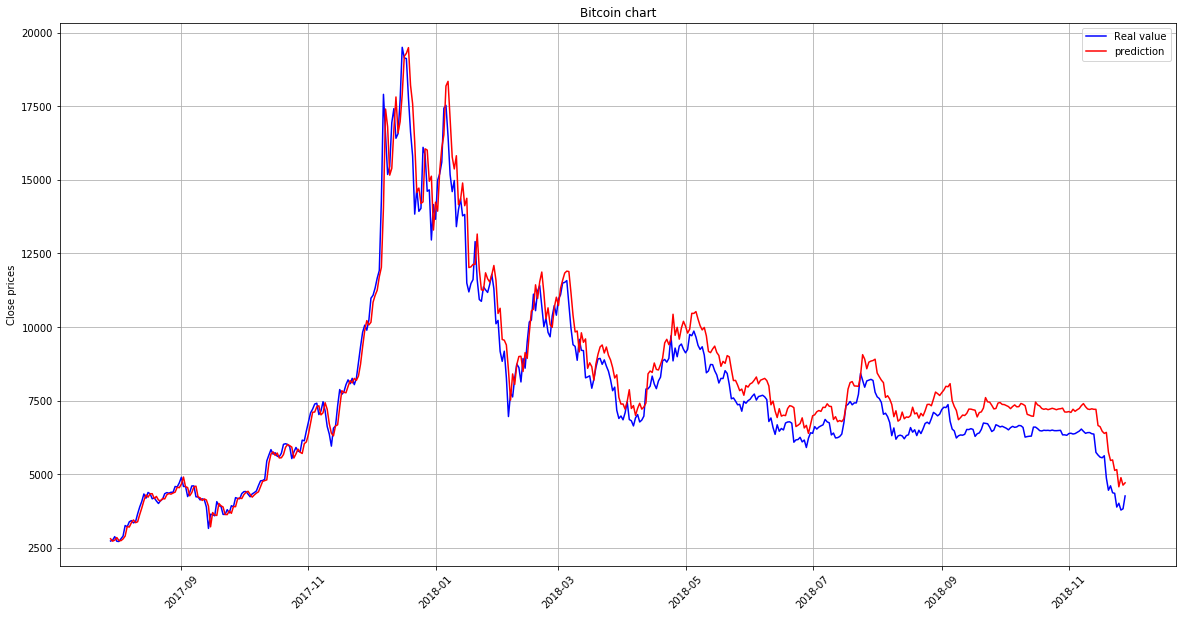

In [681]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, "Bitcoin chart", predictions_test)

In [682]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

MAE: 562.7801059742413
MSE: 516779.26529314974
RMSE: 718.8736087054175


In [683]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create model
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [684]:
from sklearn.model_selection import train_test_split
Bitcoin_train = Bitcoin.drop(columns=['close','date','pos/neg','Up/Down'])
X = Bitcoin_train
y = Bitcoin['Up/Down']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [685]:
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [686]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
Bitcoin_accuracy = accuracy_score(y_test,prediction_rfc)

In [687]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)
print(Bitcoin_accuracy)

0.5502392344497608


In [688]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.5311004784688995
confusion matrix:
 [[37 45]
 [53 74]]
classification report:
              precision    recall  f1-score   support

          0       0.41      0.45      0.43        82
          1       0.62      0.58      0.60       127

avg / total       0.54      0.53      0.53       209



In [689]:
Stellar = Stellar.reset_index(level=0, drop=True)
Stellar['pre_volume'] = np.float64()
Stellar['pre_market'] = np.float64()
Stellar['pre_high'] = np.float64()
Stellar['pre_open'] = np.float64()
Stellar['pre_close'] = np.float64()
Stellar['pre_low'] = np.float64()
Stellar['pre_close_ratio'] = np.float64()
Stellar['pre_spread'] = np.float64()
Stellar['pos/neg'] = np.float64()
for i in range(1,len(Stellar)):
    Stellar['pre_volume'][i] = Stellar['volume'].iloc[i-1]
    Stellar['pre_market'][i] = Stellar['market'].iloc[i-1]
    Stellar['pre_high'][i] = Stellar['high'].iloc[i-1]
    Stellar['pre_open'][i] = Stellar['open'].iloc[i-1]
    Stellar['pre_close'][i] = Stellar['close'].iloc[i-1]
    Stellar['pre_low'][i] = Stellar['low'].iloc[i-1]
    Stellar['pre_close_ratio'][i] = Stellar['close_ratio'].iloc[i-1]
    Stellar['pre_spread'][i] = Stellar['spread'].iloc[i-1]
for i in range(len(Stellar)-1): 
    Stellar['pos/neg'][i] = Stellar['open'].iloc[i+1] - Stellar['close'].iloc[i]
Stellar['Up/Down'] = np.where(Stellar['pos/neg']>0, '1', '0')
Stellar.tail()
Stellar = Stellar.drop(0)
Stellar = Stellar.drop(697)
Stellar.drop(['high','low', 'slug','symbol','name','ranknow','volume','market','close_ratio','spread'],axis=1,inplace=True)
Stellar.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is tryin

,date,open,close,date2num,pre_volume,pre_market,pre_high,pre_open,pre_close,pre_low,pre_close_ratio,pre_spread,pos/neg,Up/Down
1,2017-01-02,0.002475,0.002477,736331.0,39325.0,17173226.0,0.002575,0.002464,0.002481,0.002432,0.3427,0.0,2.200000e-05,1
2,2017-01-03,0.002499,0.002554,736332.0,46380.0,17142079.0,0.002537,0.002475,0.002477,0.002425,0.4643,0.0,-1.000000e-06,0
3,2017-01-04,0.002553,0.002735,736333.0,39944.0,17676906.0,0.002561,0.002499,0.002554,0.002449,0.9375,0.0,2.000000e-06,1
4,2017-01-05,0.002737,0.002598,736334.0,85385.0,18930327.0,0.002787,0.002553,0.002735,0.002541,0.7886,0.0,8.000000e-06,1
5,2017-01-06,0.002606,0.002494,736335.0,208399.0,17979654.0,0.002826,0.002737,0.002598,0.002387,0.4806,0.0,3.000000e-06,1


In [690]:
from sklearn.model_selection import train_test_split
Stellar_train = Stellar.drop(columns=['close','date','pos/neg','Up/Down'])
X = Stellar_train
y = Stellar['close']
nrow , ncol = Stellar.shape
Stellar_train
X_train = X.loc[:np.floor(nrow*0.3)]
X_test = X.loc[np.floor(nrow*0.3)+1:]
y_train = y.loc[:np.floor(nrow*0.3)]
y_test = y.loc[np.floor(nrow*0.3)+1:]
date_train = Stellar[['date']].loc[:np.floor(nrow*0.3)]
date_test = Stellar[['date']].loc[np.floor(nrow*0.3)+1:]
def plot_stock(date, outcome, title, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    plt.plot_date(date, outcome, fmt='b-', xdate=True, ydate=False, label='Real value')
    if prediction is not None:
        plt.plot_date(date, prediction, fmt='r-', xdate=True, ydate=False, label='prediction')
    plt.ylabel('Close prices')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    return

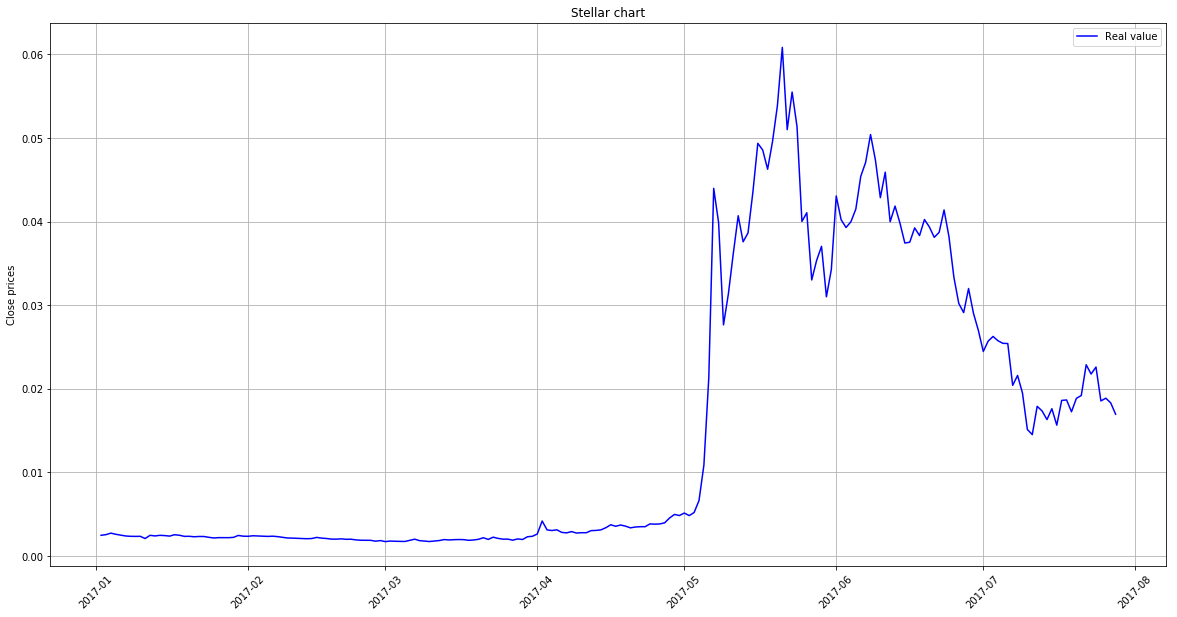

In [691]:
plot_stock(date_train, y_train, "Stellar chart")

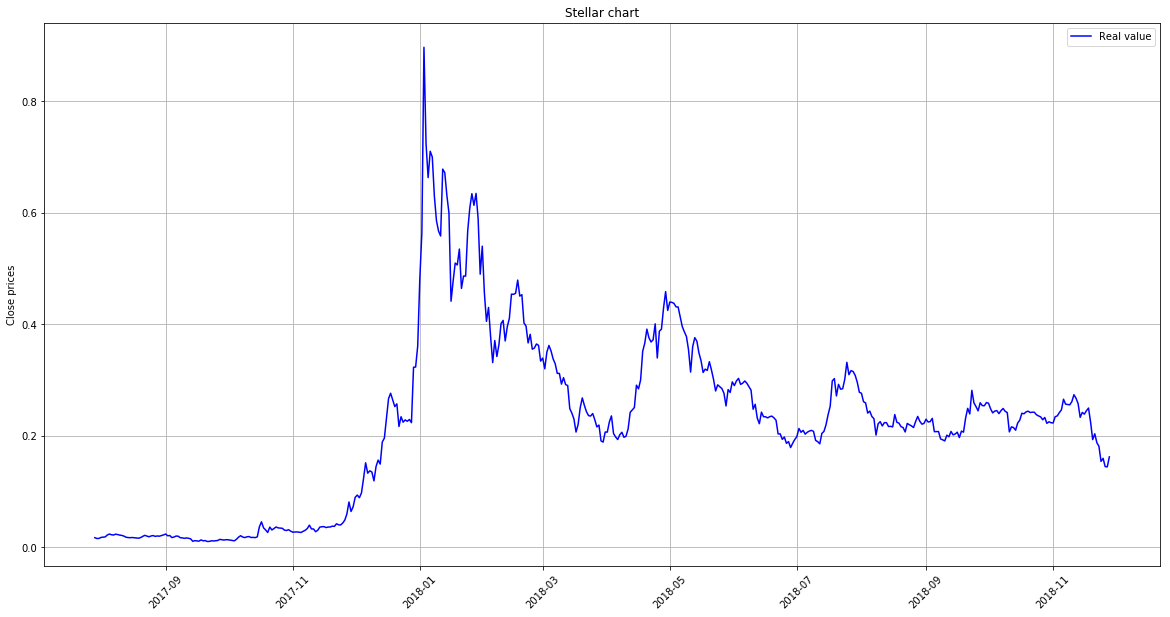

In [692]:
plot_stock(date_test, y_test, "Stellar chart")

[ 7.06719590e-01  2.20646853e-05  7.84278016e-12 -1.12925169e-10
 -8.14304104e-01  2.80609120e-01  2.15678273e+00 -2.90346765e-01
 -3.34755682e-04  2.50804623e-01]
-16.248158313668345


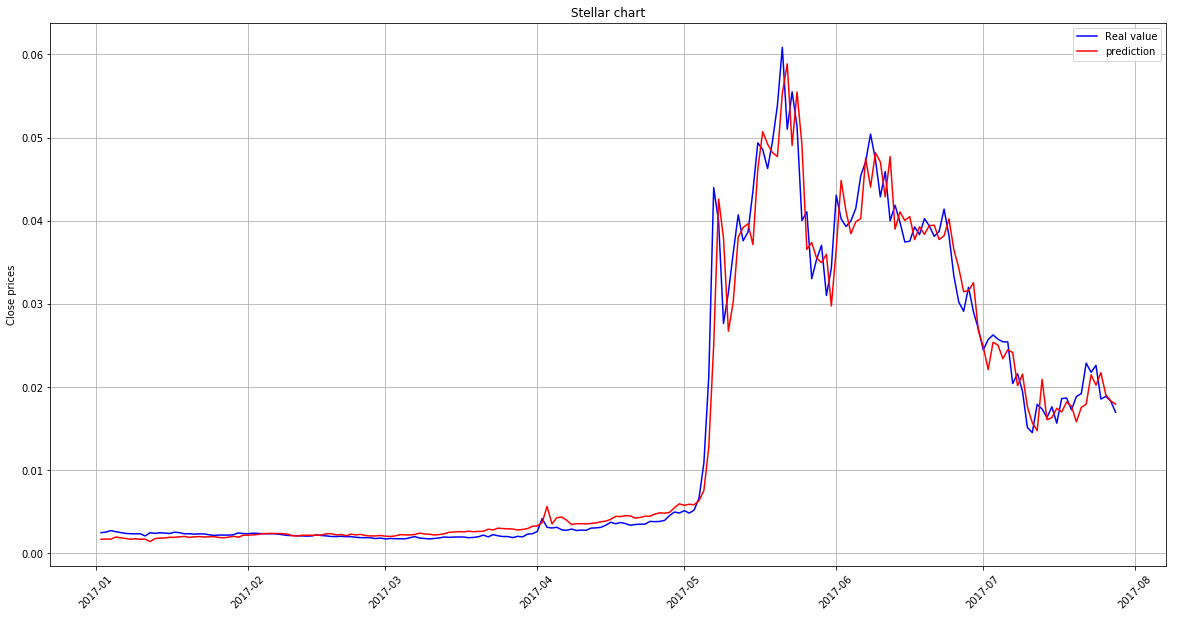

In [693]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, "Stellar chart", predictions_train)

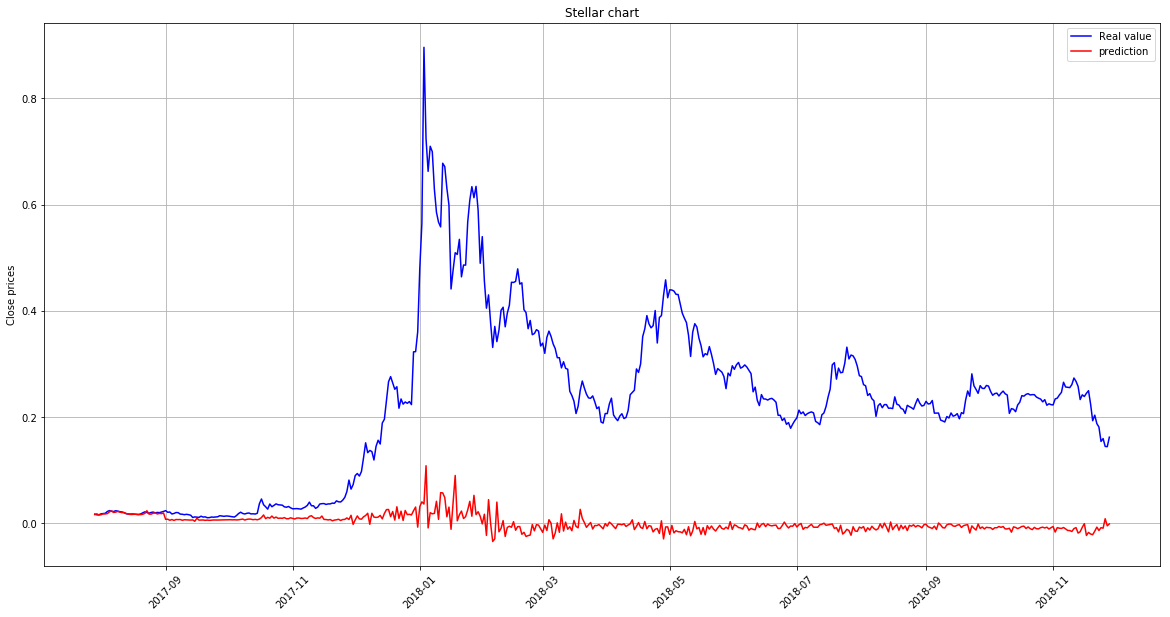

In [694]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, "Stellar chart", predictions_test)

In [695]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

MAE: 0.2219665896575537
MSE: 0.07381656935592
RMSE: 0.27169204875358427


In [696]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
from sklearn.model_selection import train_test_split
Stellar_train = Stellar.drop(columns=['close','date','pos/neg','Up/Down'])
X = Stellar_train
y = Stellar['Up/Down']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [697]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
Stella_accuracy = accuracy_score(y_test,prediction_rfc)


In [698]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)
print(Stella_accuracy)

0.46411483253588515


In [699]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.5119617224880383
confusion matrix:
 [[59 47]
 [55 48]]
classification report:
              precision    recall  f1-score   support

          0       0.52      0.56      0.54       106
          1       0.51      0.47      0.48       103

avg / total       0.51      0.51      0.51       209



In [700]:
XRP = XRP.reset_index(level=0, drop=True)
XRP['pre_volume'] = np.float64()
XRP['pre_market'] = np.float64()
XRP['pre_high'] = np.float64()
XRP['pre_open'] = np.float64()
XRP['pre_close'] = np.float64()
XRP['pre_low'] = np.float64()
XRP['pre_close_ratio'] = np.float64()
XRP['pre_spread'] = np.float64()
XRP['pos/neg'] = np.float64()
for i in range(1,len(XRP)):
    XRP['pre_volume'][i] = XRP['volume'].iloc[i-1]
    XRP['pre_market'][i] = XRP['market'].iloc[i-1]
    XRP['pre_high'][i] = XRP['high'].iloc[i-1]
    XRP['pre_open'][i] = XRP['open'].iloc[i-1]
    XRP['pre_close'][i] = XRP['close'].iloc[i-1]
    XRP['pre_low'][i] = XRP['low'].iloc[i-1]
    XRP['pre_close_ratio'][i] = XRP['close_ratio'].iloc[i-1]
    XRP['pre_spread'][i] = XRP['spread'].iloc[i-1]
for i in range(len(XRP)-1): 
    XRP['pos/neg'][i] = XRP['open'].iloc[i+1] - XRP['close'].iloc[i]
XRP['Up/Down'] = np.where(XRP['pos/neg']>0, '1', '0')
XRP.tail()
XRP = XRP.drop(0)
XRP = XRP.drop(697)
XRP.drop(['high','low', 'slug','symbol','name','ranknow','volume','market','close_ratio','spread'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is tryin

In [701]:
from sklearn.model_selection import train_test_split
XRP_train = XRP.drop(columns=['close','date','pos/neg','Up/Down'])
X = XRP_train
y = XRP['close']
nrow , ncol = XRP.shape
X_train = X.loc[:np.floor(nrow*0.3)]
X_test = X.loc[np.floor(nrow*0.3)+1:]
y_train = y.loc[:np.floor(nrow*0.3)]
y_test = y.loc[np.floor(nrow*0.3)+1:]
date_train = XRP[['date']].loc[:np.floor(nrow*0.3)]
date_test = XRP[['date']].loc[np.floor(nrow*0.3)+1:]

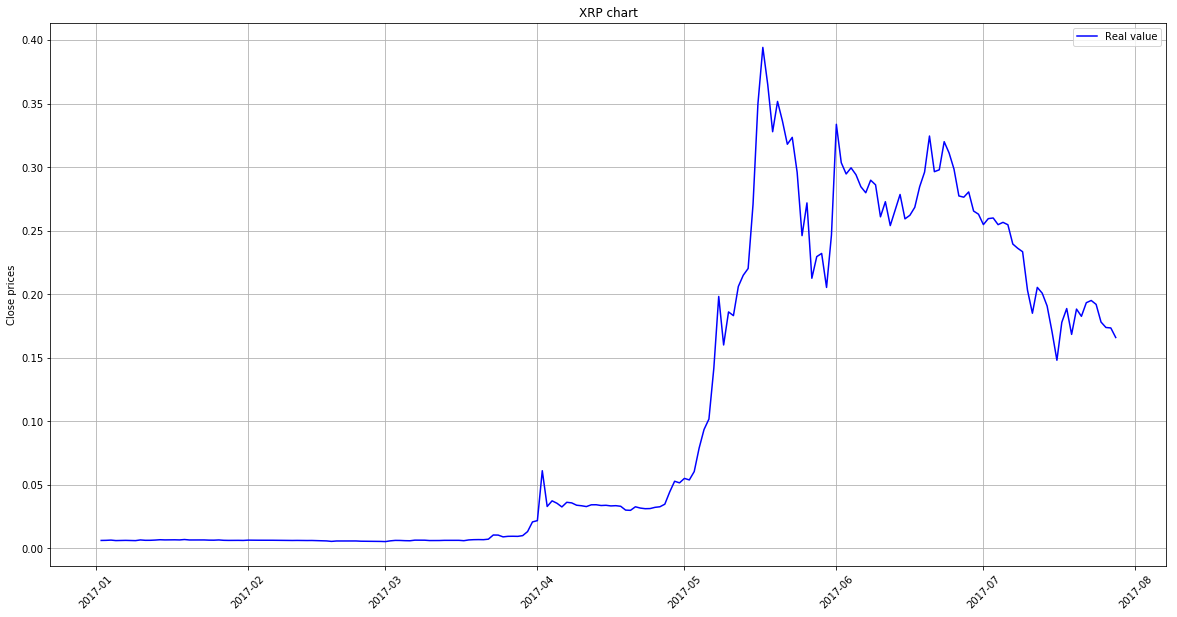

In [702]:
plot_stock(date_train, y_train, "XRP chart")

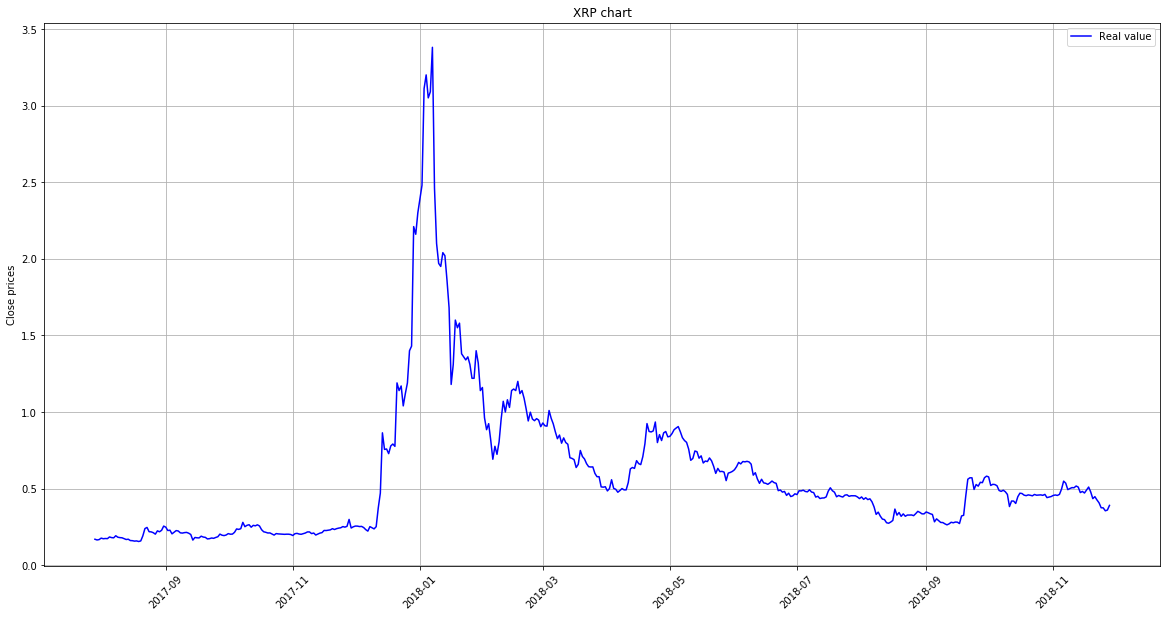

In [703]:
plot_stock(date_test, y_test, "XRP chart")

In [704]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[ 6.75257727e-01 -2.21490267e-05 -2.60679923e-11 -1.94762945e-10
 -2.51170537e-01  7.23662662e-01  8.96730310e+00 -1.62069136e+00
  1.74843268e-03 -6.68264202e-01]
16.307801991556577


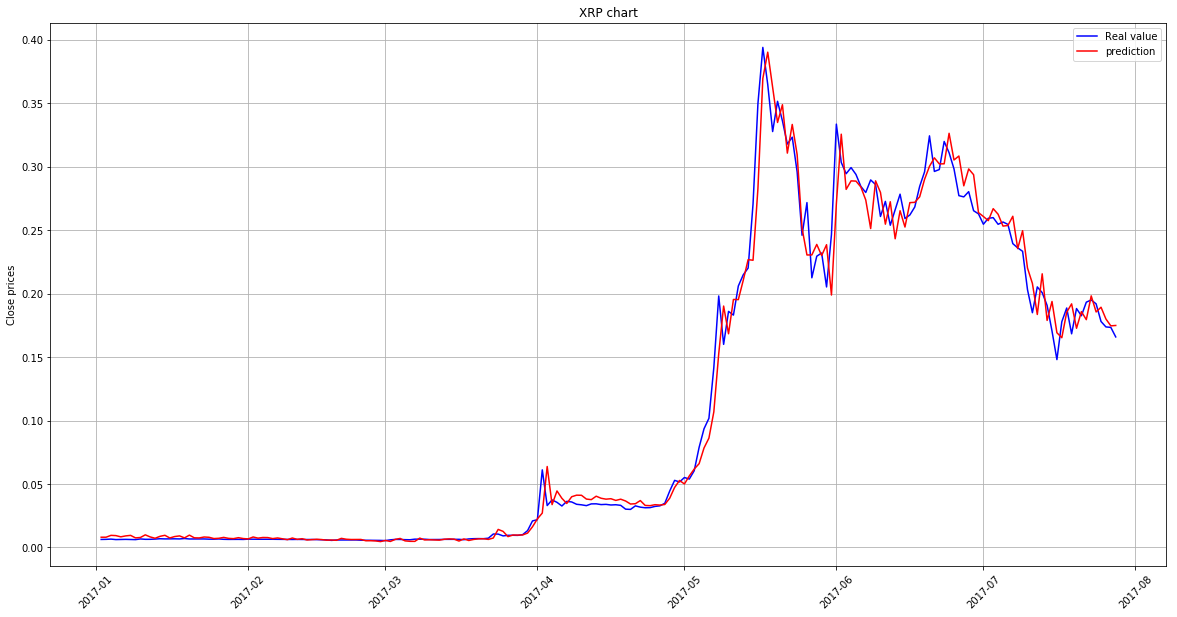

In [705]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, "XRP chart", predictions_train)

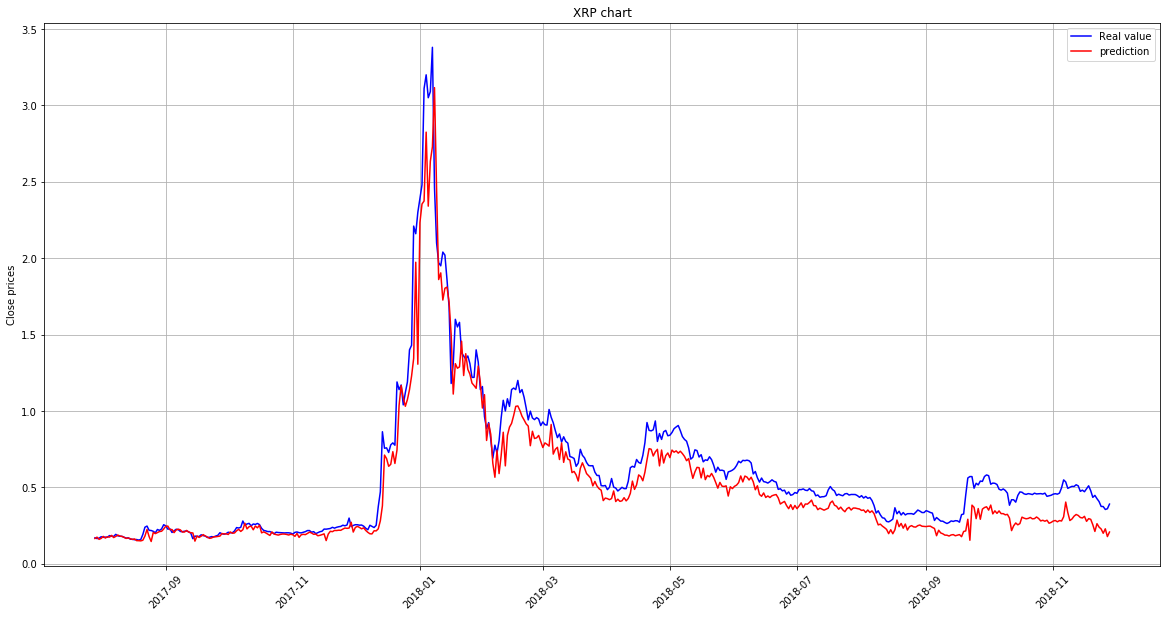

In [706]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, "XRP chart", predictions_test)

In [707]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

MAE: 0.10423950828020513
MSE: 0.022693804095276132
RMSE: 0.15064462849791935


In [708]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
from sklearn.model_selection import train_test_split
XRP_train = XRP.drop(columns=['close','date','pos/neg','Up/Down'])
X = XRP_train
y = XRP['Up/Down']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [709]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
XRP_accuracy = accuracy_score(y_test,prediction_rfc)

In [710]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)
print(XRP_accuracy)

0.5406698564593302


In [711]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.5215311004784688
confusion matrix:
 [[65 45]
 [55 44]]
classification report:
              precision    recall  f1-score   support

          0       0.54      0.59      0.57       110
          1       0.49      0.44      0.47        99

avg / total       0.52      0.52      0.52       209



In [712]:
Ethereum = Ethereum.reset_index(level=0, drop=True)
Ethereum['pre_volume'] = np.float64()
Ethereum['pre_market'] = np.float64()
Ethereum['pre_high'] = np.float64()
Ethereum['pre_open'] = np.float64()
Ethereum['pre_close'] = np.float64()
Ethereum['pre_low'] = np.float64()
Ethereum['pre_close_ratio'] = np.float64()
Ethereum['pre_spread'] = np.float64()
Ethereum['pos/neg'] = np.float64()
for i in range(1,len(Ethereum)):
    Ethereum['pre_volume'][i] = Ethereum['volume'].iloc[i-1]
    Ethereum['pre_market'][i] = Ethereum['market'].iloc[i-1]
    Ethereum['pre_high'][i] = Ethereum['high'].iloc[i-1]
    Ethereum['pre_open'][i] = Ethereum['open'].iloc[i-1]
    Ethereum['pre_close'][i] = Ethereum['close'].iloc[i-1]
    Ethereum['pre_low'][i] = Ethereum['low'].iloc[i-1]
    Ethereum['pre_close_ratio'][i] = Ethereum['close_ratio'].iloc[i-1]
    Ethereum['pre_spread'][i] = Ethereum['spread'].iloc[i-1]
for i in range(len(Ethereum)-1): 
    Ethereum['pos/neg'][i] = Ethereum['open'].iloc[i+1] - Ethereum['close'].iloc[i]
Ethereum['Up/Down'] = np.where(Ethereum['pos/neg']>0, '1', '0')
Ethereum.tail()
Ethereum = Ethereum.drop(0)
Ethereum = Ethereum.drop(697)
Ethereum.drop(['high','low', 'slug','symbol','name','ranknow','volume','market','close_ratio','spread'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is tryin

In [713]:
from sklearn.model_selection import train_test_split
Ethereum_train = Ethereum.drop(columns=['close','date','pos/neg','Up/Down'])
X = Ethereum_train
y = Ethereum['close']
nrow , ncol = Ethereum.shape
X_train = X.loc[:np.floor(nrow*0.3)]
X_test = X.loc[np.floor(nrow*0.3)+1:]
y_train = y.loc[:np.floor(nrow*0.3)]
y_test = y.loc[np.floor(nrow*0.3)+1:]
date_train = Ethereum[['date']].loc[:np.floor(nrow*0.3)]
date_test = Ethereum[['date']].loc[np.floor(nrow*0.3)+1:]

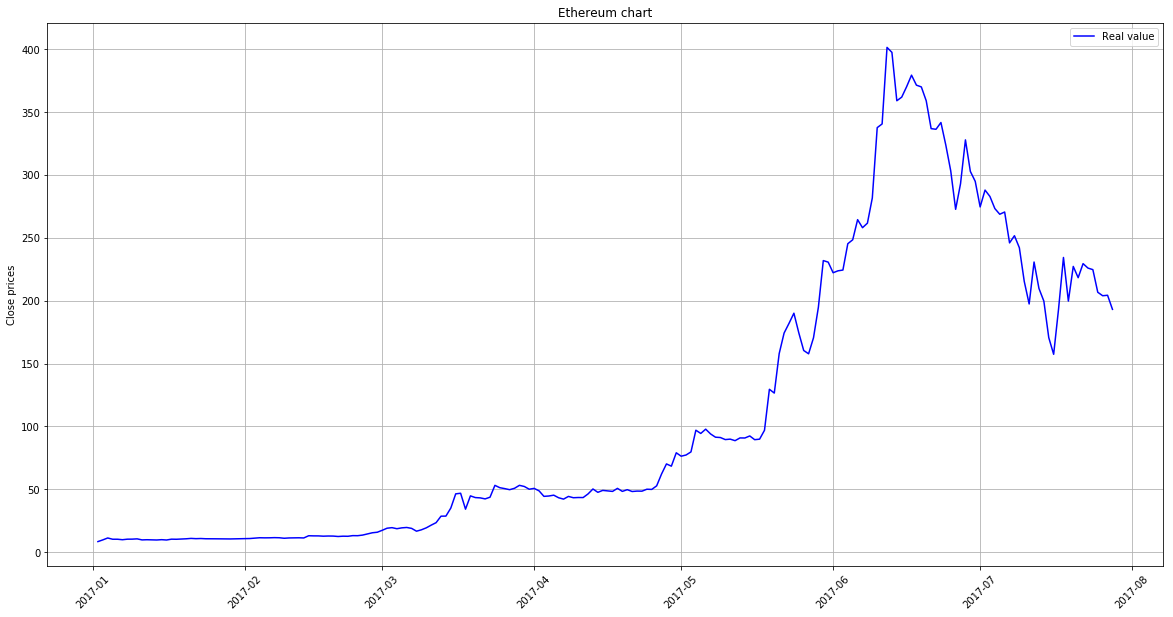

In [714]:
plot_stock(date_train, y_train, "Ethereum chart")

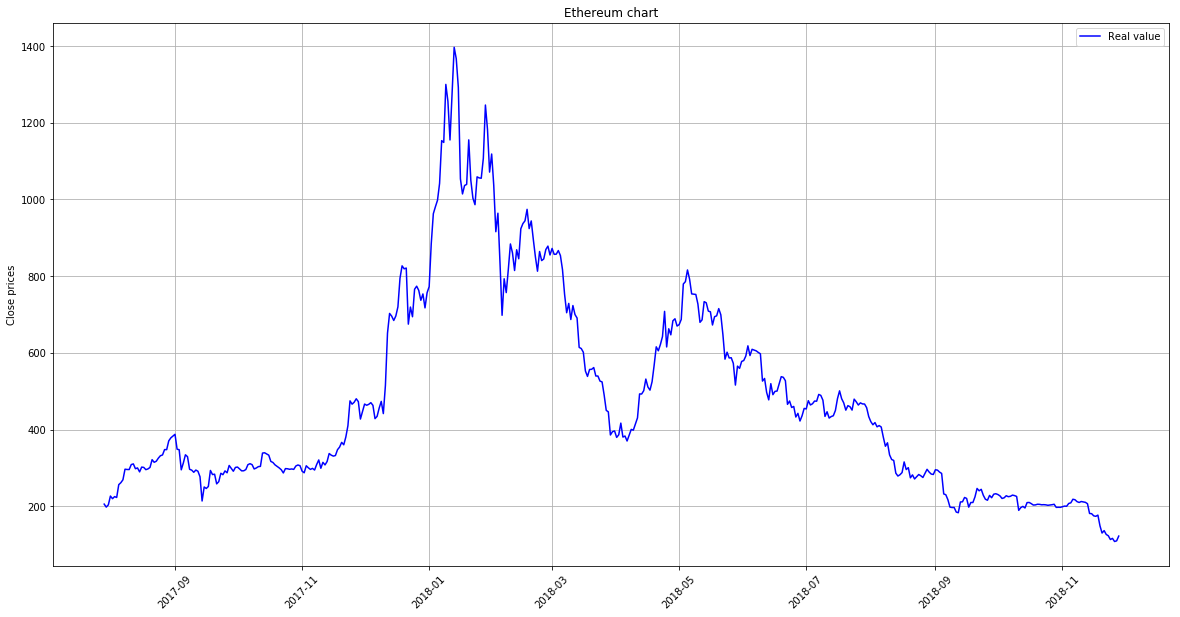

In [715]:
plot_stock(date_test, y_test, "Ethereum chart")

In [716]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[ 3.76221260e+00  4.30050018e-02  6.05656279e-09 -4.56823689e-08
 -3.47137597e-01  2.67971239e-01  1.79547324e+00 -2.71911071e-01
  3.25550571e+00 -7.52265260e-02]
-31672.029642062247


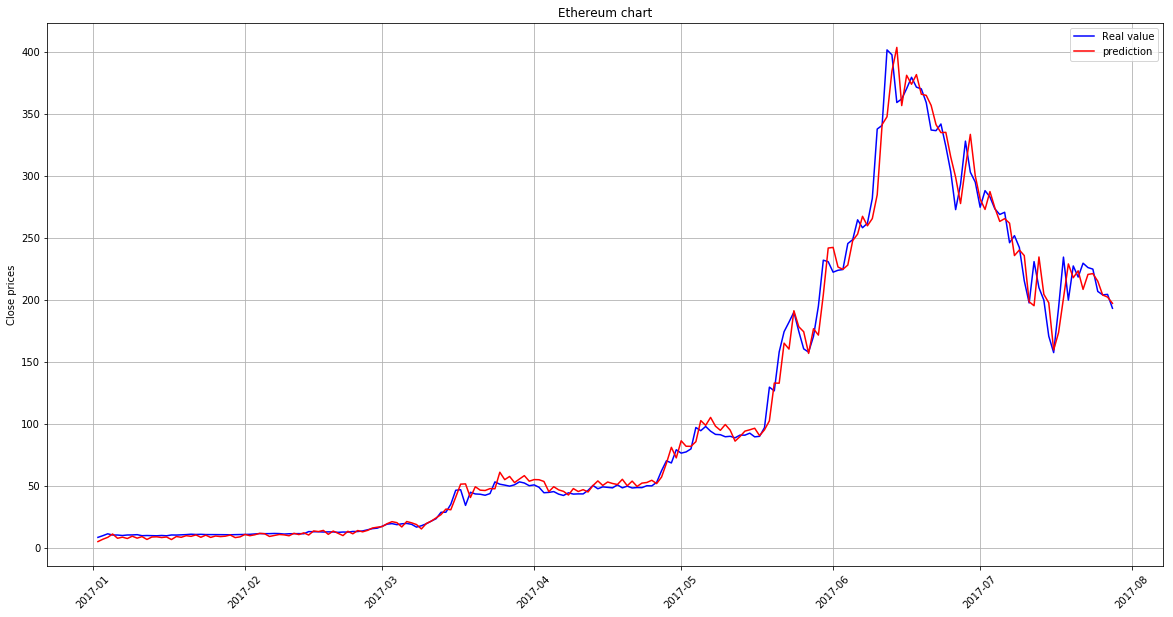

In [717]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, "Ethereum chart", predictions_train)

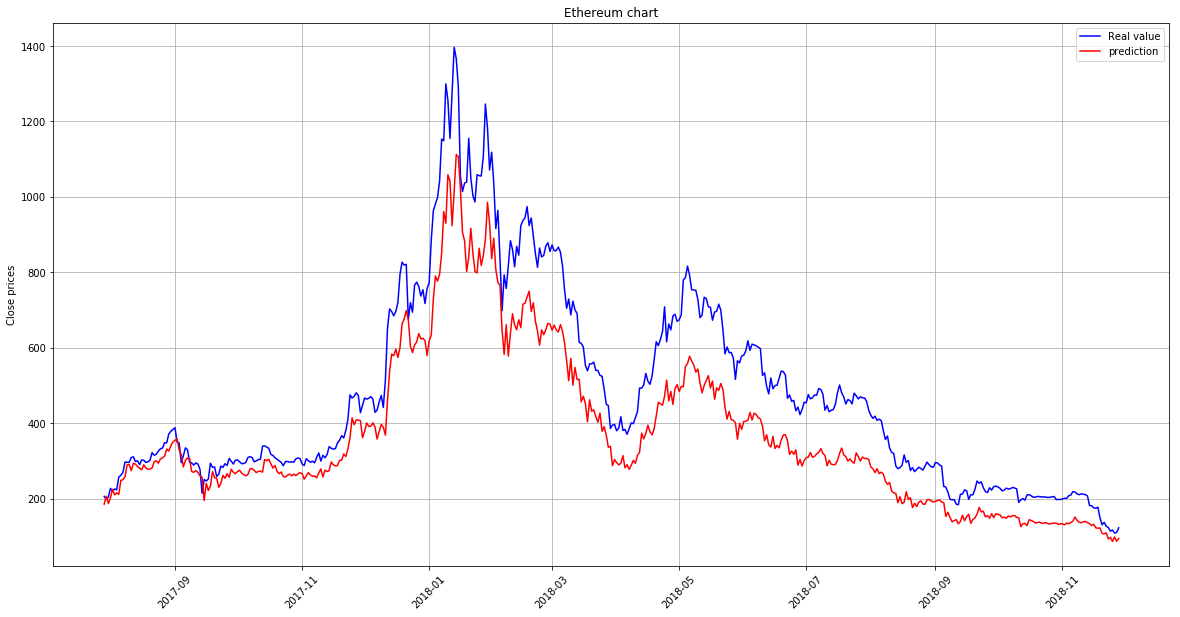

In [718]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, "Ethereum chart", predictions_test)

In [719]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))


MAE: 108.64286873984899
MSE: 17037.379186575214
RMSE: 130.5273120330577


In [720]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
from sklearn.model_selection import train_test_split
Ethereum_train = Ethereum.drop(columns=['close','date','pos/neg','Up/Down'])
X = Ethereum_train
y = Ethereum['Up/Down']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [721]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
Ethereum_accuracy = accuracy_score(y_test,prediction_rfc)

In [722]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)
print(Ethereum_accuracy)

0.49282296650717705


In [723]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.4880382775119617
confusion matrix:
 [[41 43]
 [64 61]]
classification report:
              precision    recall  f1-score   support

          0       0.39      0.49      0.43        84
          1       0.59      0.49      0.53       125

avg / total       0.51      0.49      0.49       209



In [724]:
Bitcoin_Cash = Bitcoin_Cash.reset_index(level=0, drop=True)
Bitcoin_Cash['pre_volume'] = np.float64()
Bitcoin_Cash['pre_market'] = np.float64()
Bitcoin_Cash['pre_high'] = np.float64()
Bitcoin_Cash['pre_open'] = np.float64()
Bitcoin_Cash['pre_close'] = np.float64()
Bitcoin_Cash['pre_low'] = np.float64()
Bitcoin_Cash['pre_close_ratio'] = np.float64()
Bitcoin_Cash['pre_spread'] = np.float64()
Bitcoin_Cash['pos/neg'] = np.float64()
for i in range(1,len(Bitcoin_Cash)):
    Bitcoin_Cash['pre_volume'][i] = Bitcoin_Cash['volume'].iloc[i-1]
    Bitcoin_Cash['pre_market'][i] = Bitcoin_Cash['market'].iloc[i-1]
    Bitcoin_Cash['pre_high'][i] = Bitcoin_Cash['high'].iloc[i-1]
    Bitcoin_Cash['pre_open'][i] = Bitcoin_Cash['open'].iloc[i-1]
    Bitcoin_Cash['pre_close'][i] = Bitcoin_Cash['close'].iloc[i-1]
    Bitcoin_Cash['pre_low'][i] = Bitcoin_Cash['low'].iloc[i-1]
    Bitcoin_Cash['pre_close_ratio'][i] = Bitcoin_Cash['close_ratio'].iloc[i-1]
    Bitcoin_Cash['pre_spread'][i] = Bitcoin_Cash['spread'].iloc[i-1]
for i in range(len(Bitcoin_Cash)-1): 
    Bitcoin_Cash['pos/neg'][i] = Bitcoin_Cash['open'].iloc[i+1] - Bitcoin_Cash['close'].iloc[i]
Bitcoin_Cash['Up/Down'] = np.where(Bitcoin_Cash['pos/neg']>0, '1', '0')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is tryin

In [725]:
Bitcoin_Cash.tail()
Bitcoin_Cash = Bitcoin_Cash.drop(0)
Bitcoin_Cash = Bitcoin_Cash.drop(494)
Bitcoin_Cash.drop(['high','low', 'slug','symbol','name','ranknow','volume','market','close_ratio','spread'],axis=1,inplace=True)

In [726]:
from sklearn.model_selection import train_test_split
Bitcoin_Cash_train = Bitcoin_Cash.drop(columns=['close','date','pos/neg','Up/Down'])
X = Bitcoin_Cash_train
y = Bitcoin_Cash['close']
nrow , ncol = Bitcoin_Cash.shape
X_train = X.loc[:np.floor(nrow*0.3)]
X_test = X.loc[np.floor(nrow*0.3)+1:]
y_train = y.loc[:np.floor(nrow*0.3)]
y_test = y.loc[np.floor(nrow*0.3)+1:]
date_train = Bitcoin_Cash[['date']].loc[:np.floor(nrow*0.3)]
date_test = Bitcoin_Cash[['date']].loc[np.floor(nrow*0.3)+1:]

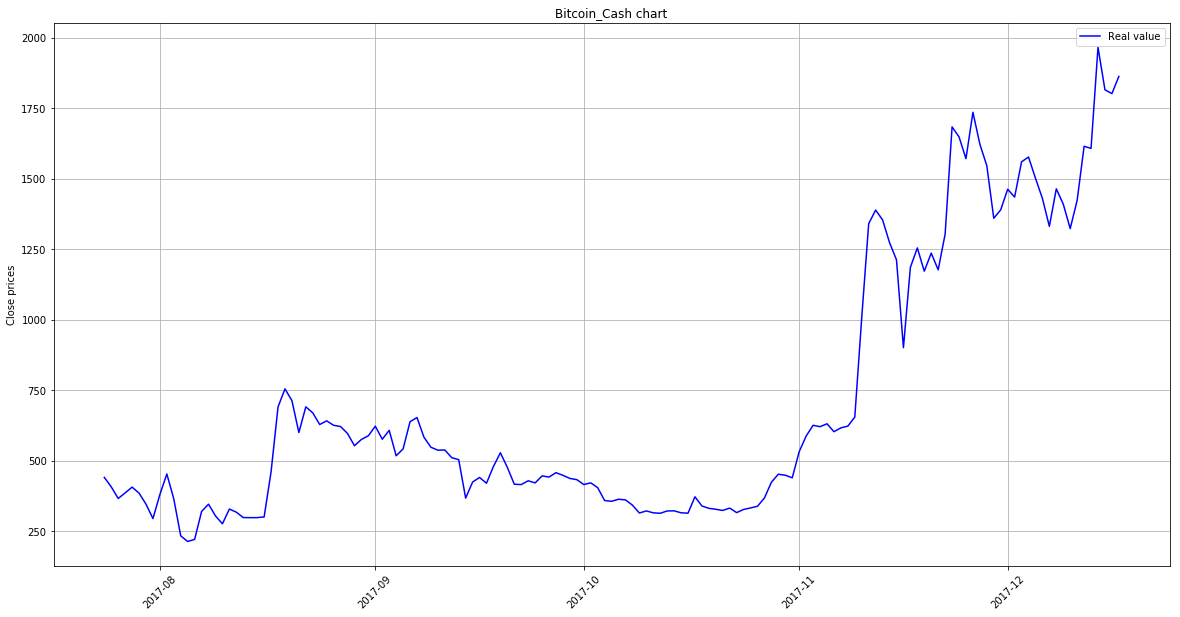

In [727]:
plot_stock(date_train, y_train, "Bitcoin_Cash chart")

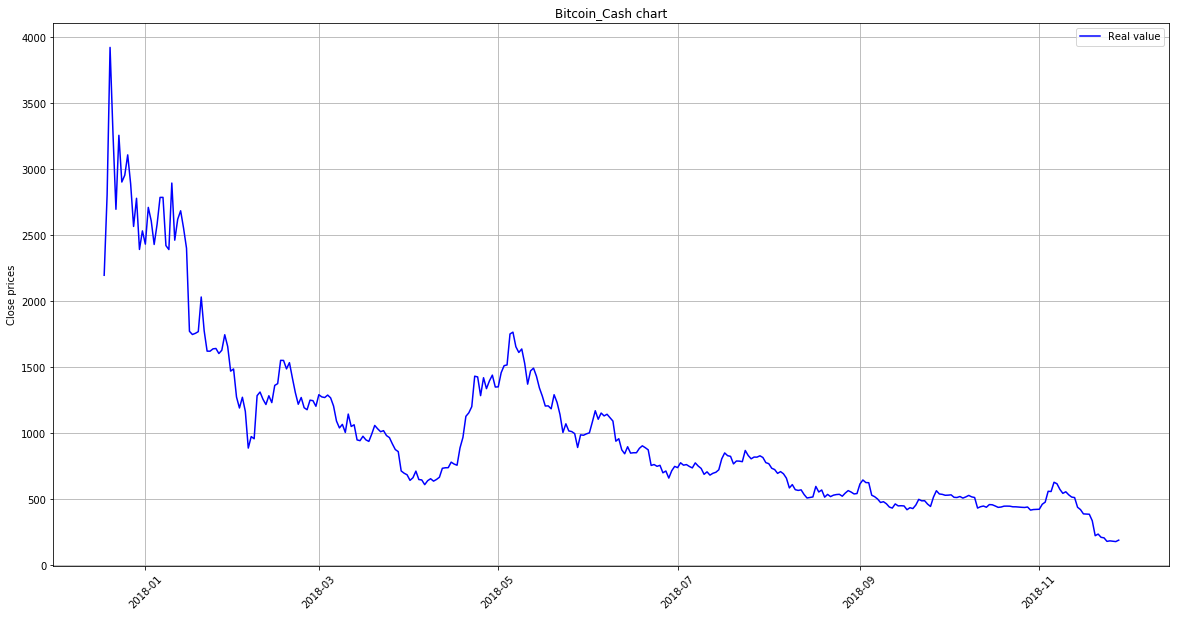

In [728]:
plot_stock(date_test, y_test, "Bitcoin_Cash chart")

In [729]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[ 1.16048809e+00  5.31913146e-01  4.55544580e-09  9.81701253e-11
 -1.53398685e-01  2.07441758e-01 -5.03485316e-02 -2.21253274e-01
  3.96600307e+01  6.78545891e-02]
-391794.196673241


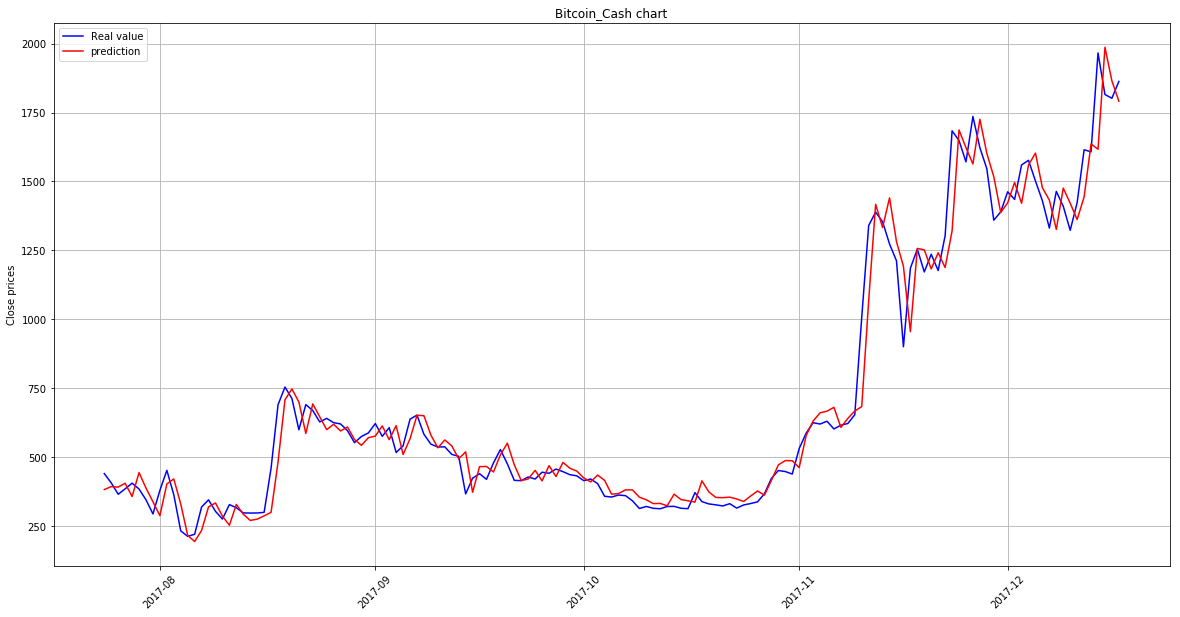

In [730]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, "Bitcoin_Cash chart", predictions_train)

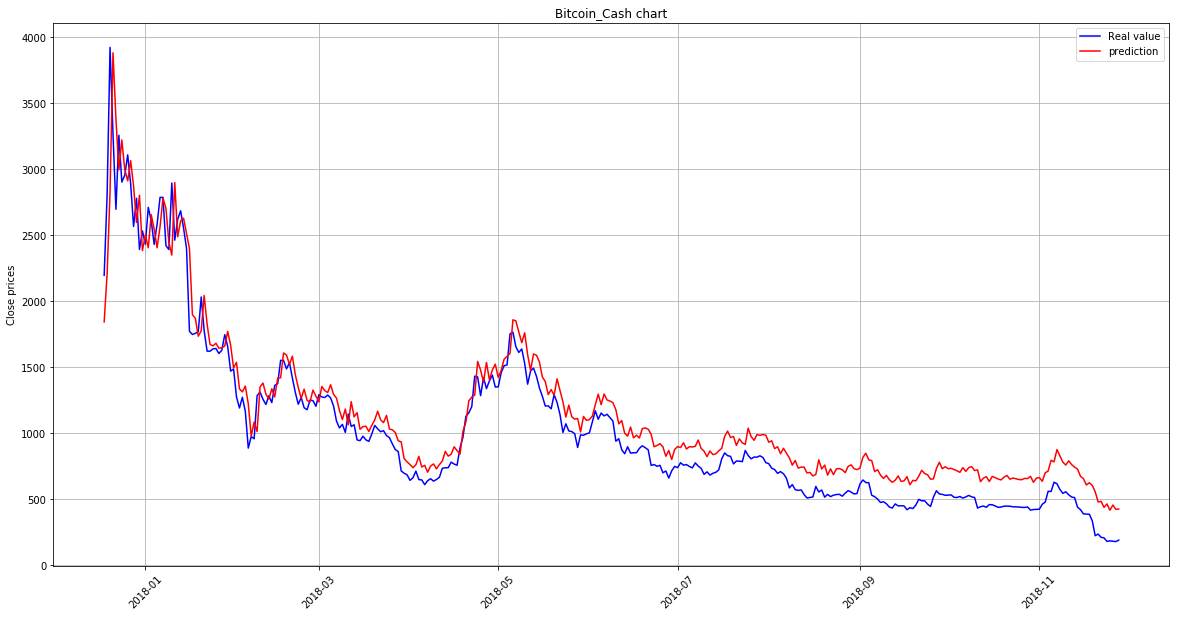

In [731]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, "Bitcoin_Cash chart", predictions_test)

In [732]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

MAE: 165.03533543653162
MSE: 38304.200273127775
RMSE: 195.7145888101543


In [733]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
from sklearn.model_selection import train_test_split
Bitcoin_Cash_train = Bitcoin_Cash.drop(columns=['close','date','pos/neg','Up/Down'])
X = Bitcoin_Cash_train
y = Bitcoin_Cash['Up/Down']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [734]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
Bitcoin_Cash_accuracy = accuracy_score(y_test,prediction_rfc)

In [735]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)
print(Bitcoin_Cash_accuracy)

0.5135135135135135


In [736]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.4864864864864865
confusion matrix:
 [[30 46]
 [30 42]]
classification report:
              precision    recall  f1-score   support

          0       0.50      0.39      0.44        76
          1       0.48      0.58      0.53        72

avg / total       0.49      0.49      0.48       148



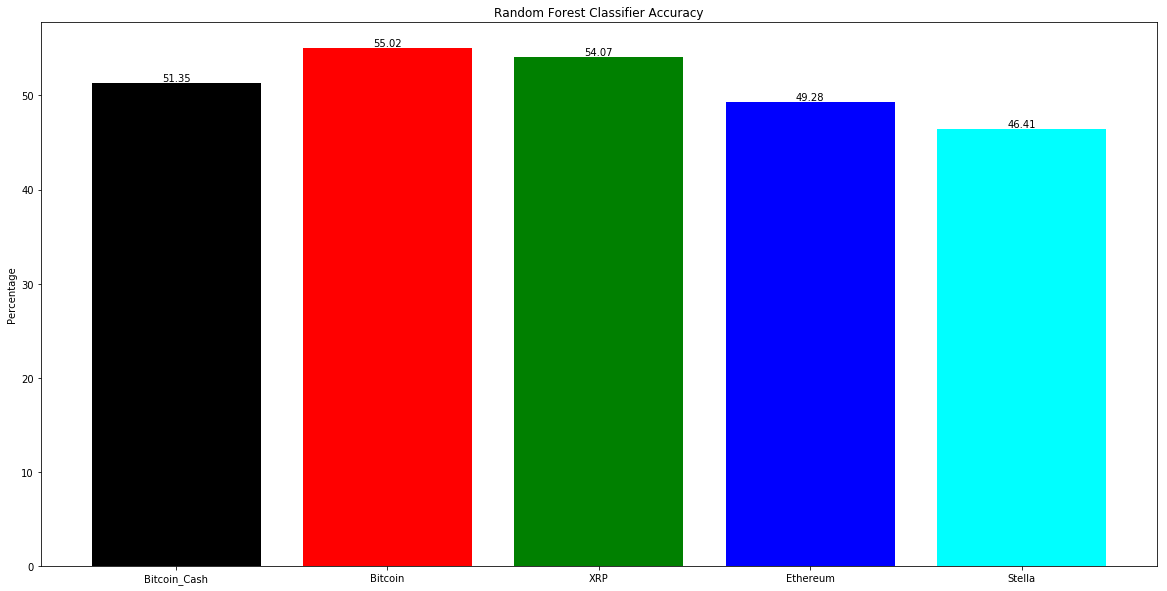

In [744]:
plt.figure(figsize=(20,10))
objects = ('Bitcoin_Cash', 'Bitcoin','XRP','Ethereum','Stella')
y_pos = np.arange(len(objects))
num = [round(Bitcoin_Cash_accuracy*100,2),round(Bitcoin_accuracy*100,2),round(XRP_accuracy*100,2),round(Ethereum_accuracy*100,2),round(Stella_accuracy*100,2)]
 
ax = plt.bar(y_pos, num, align='center', alpha=1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Random Forest Classifier Accuracy')
rects = ax.patches
labels = num
for rect, label in zip(rects, labels):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')

0.5135135135135135